# Plotting some figures 

In [1]:
import os
import sys

import numpy as np
import pandas as pd

from tqdm import tqdm
from IPython.display import clear_output

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

sys.path.insert(0, '../../../icenumerics/')
sys.path.insert(0, '../auxnumerics/')
sys.path.insert(0, '../')

import icenumerics as ice
import auxiliary as aux

from parameters import params

%reload_ext autoreload
%autoreload 2

ureg = ice.ureg
idx = pd.IndexSlice

In [51]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'xtick.labelsize':10,
    'ytick.labelsize':10,
    'axes.labelsize':10,
})

In [6]:
DATA_PATH = '../../data/test11'
MOUNT_DRIVE = '/home/frieren/Documents/projects/'
PROJECT = 'frequencygs/data'
DATA_PATH = os.path.join(MOUNT_DRIVE, PROJECT,'test11')
SIZE = 10

# Figure reference

For reference, I want all my figures to be 3.2 in in width since that is the width of a column.

## Vertices counts

In [7]:
# load the csv that has all counts for all total time (omega vals)
# and the complete timeseries
raw_data = pd.read_csv(os.path.join(DATA_PATH,'10','average_counts.csv'),index_col=['field','time'])

# compute the omega values, and theta as well
omega = np.pi/2/raw_data.total_time.to_numpy()

# append omega and theta to the df
raw_data['omega'] = np.around(omega,4)
raw_data['theta'] = raw_data.index.get_level_values('time') * raw_data.omega

In [8]:
data20 = raw_data.xs(20,level='field').reset_index()
max_times = {w:df.time.max() for w,df in data20.groupby('omega')} 
counts = pd.concat(data20.query(f'omega=={w} & time=={t}') for w,t in max_times.items()).sort_values('omega')

## Charge OP
This is precalulated in a script so that I can only read a and plot it

In [10]:
# include the charge OP

# reading data and adding the theta column
kappa = pd.read_csv(os.path.join(DATA_PATH,'10','kappa.csv'))
kappa['theta'] = np.round(kappa.t * np.pi/2/kappa.total_time * 180/np.pi,4)
kappa['kappa'] = np.abs(kappa['kappa'])

# averaging across realizations
avkappa = pd.DataFrame(kappa.groupby(['total_time','theta'])['kappa'].mean()).reset_index()
stdkappa = pd.DataFrame(kappa.groupby(['total_time','theta'])['kappa'].std()).reset_index()

avkappa['omega'] = np.pi/2/avkappa.total_time
stdkappa['omega'] = np.pi/2/stdkappa.total_time

# this is getting the last state for each omega
maxth = {w:df.theta.max() for w,df in avkappa.groupby('omega')} 
final_kappa = pd.concat(
    avkappa.query(f'omega=={w} & theta=={th}') for w,th in maxth.items()).sort_values('omega')

fstd_kappa = pd.concat(
    stdkappa.query(f'omega=={w} & theta=={th}') for w,th in maxth.items()).sort_values('omega')

# normalization
norm_factor = 1/4/params['size']**2 
final_kappa.kappa = final_kappa.kappa * norm_factor
fstd_kappa.kappa = (fstd_kappa.kappa * norm_factor)

##  Chiratity OP

In [11]:
# reading data and adding the theta column
chirs = pd.read_csv(os.path.join(DATA_PATH,'10','chirs.csv'))
chirs['theta'] = np.round(chirs.t * np.pi/2/kappa.total_time * 180/np.pi,4)
chirs['chir'] = np.abs(chirs['chir'])
# averaging across realizations
avchirs = pd.DataFrame(chirs.groupby(['total_time','theta'])['chir'].mean()).reset_index()
avchirs['omega'] = np.pi/2/avchirs.total_time

In [12]:
# this is getting the last state for each omega
maxth = {w:df.theta.max() for w,df in avchirs.groupby('omega')} 
final_chir = pd.concat(
    avchirs.query(f'omega=={w} & theta=={th}') for w,th in maxth.items()).sort_values('omega')
# normalization
final_chir.chir = final_chir.chir / params['size']**2
final_chir

,total_time,theta,chir,omega
33399,1000,89.9955,0.071,0.001571
13399,100,89.9550,0.048,0.015708
11399,90,89.9500,0.045,0.017453
9599,80,89.9438,0.037,0.019635
7999,70,89.9357,0.027,0.022440
6599,50,89.9100,0.038,0.031416
5599,40,89.8875,0.028,0.039270
4799,30,89.8500,0.016,0.052360
4199,20,89.7750,0.007,0.078540
3799,19,89.7632,0.005,0.082673


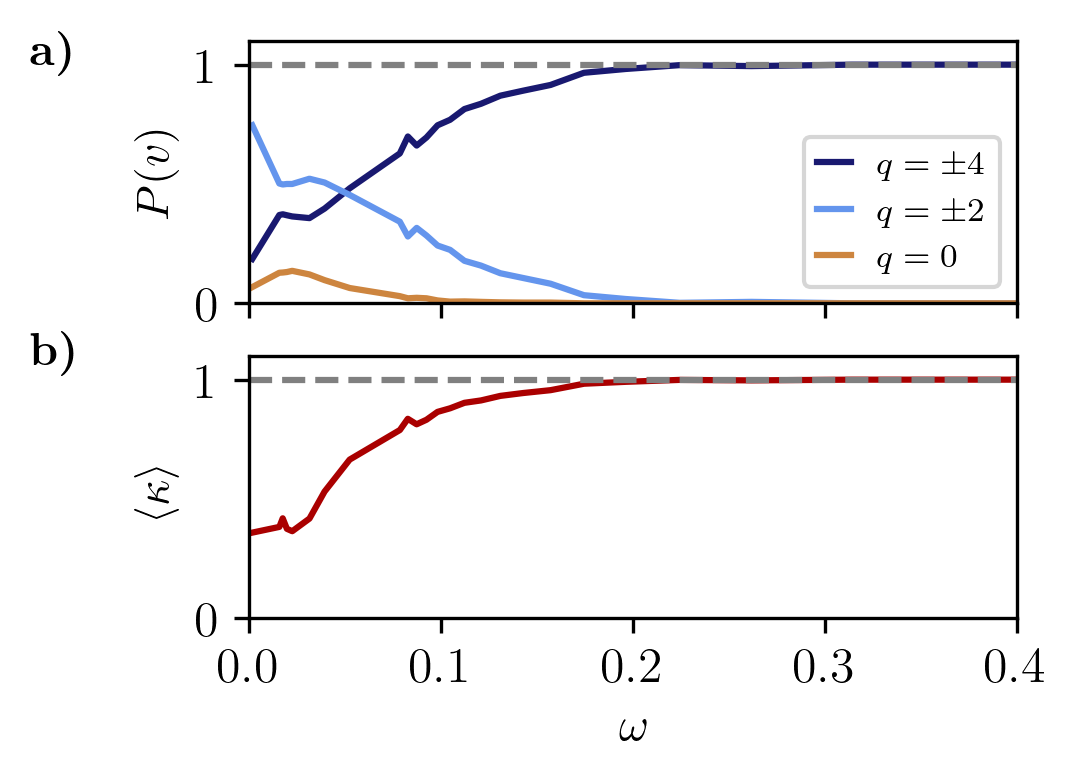

In [16]:
# the figure must be 245.52 total from 3.41 wide
# after saving it crops to 228.447
# so we need to add extra 17.073 pt to compensate, divided by 72
# 1pt = 1/72 in
# that is 0.23 in
COL = 246/72
OFFSET = 17.073/72
#OFFSET = 0

fig, axes = plt.subplots(2,1,figsize=(COL+OFFSET,2.5),dpi=300)
#fig.tight_layout()
#fig.subplots_adjust(hspace=0.1)


#fig = plt.figure(figsize=(3.41+OFFSET, 3),dpi=200)
#gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1], hspace=0.3, wspace=0.3)
#fig.tight_layout()


types = ['I','II','III','VI','V','VI']
colors = ['#191970', '#6495ed', '#cd853f']

# ==========================================================================================================
# VERTICES COUNTS
# ==========================================================================================================

#ax = fig.add_subplot(gs[0])
ax = axes[0]
ax.plot(counts.omega, counts.I + counts.VI,'-',color=colors[0], label='$q=\\pm 4$')
ax.plot(counts.omega, counts.II + counts.V,'-',color=colors[1], label='$q=\\pm 2$')
ax.plot(counts.omega, counts.III + counts.IV,'-',color=colors[2], label='$q = 0$')
ax.set_xlim(0,0.4)
ax.set_ylim(0,1.1)
ax.set_ylabel('$P(v)$', fontsize=11)
ax.set_xticklabels([])
ax.axhline(1,color='gray',linestyle='--')
ax.legend(fontsize=8,handlelength=1, ncol=1)

# ==========================================================================================================
# ORDER PARAMETERS
# ==========================================================================================================`

#ax = fig.add_subplot(gs[1])
ax = axes[1]
ax.plot(final_kappa.omega, final_kappa.kappa, color='#aa0000', label='$\\kappa$')

ax.set_xlim(0,0.4)
ax.set_ylim(0,1.1)
ax.set_ylabel('$\\langle \\kappa \\rangle$', fontsize=11)
ax.set_xlabel('$\\omega$', fontsize=11)
ax.axhline(1,color='gray',linestyle='--')
#ax.axhline(0.5,color='gray',linestyle='--')

# ==========================================================================================================
# LABELS AND OTHER STUFF
# ==========================================================================================================`

fig.subplots_adjust(left=0.2)  # Adjust the bottom space to make room for the shared axis label
fig.text(0,0.85,'\\textbf{a)}',fontsize=11)
fig.text(0,0.45,'\\textbf{b)}',fontsize=11)


plt.show()
#fig.savefig('/home/frieren/Dropbox/mnt/martensitepaper/fig3.pdf',dpi=300,bbox_inches='tight',pad_inches=0)
#fig.savefig('/home/frieren/Dropbox/mnt/martensitepaper/fig3.png',dpi=300,bbox_inches='tight',pad_inches=0)

#fig.savefig('/home/frieren/Dropbox/mnt/martensitepaper/fig3.pdf',dpi=300)

#  For thesis

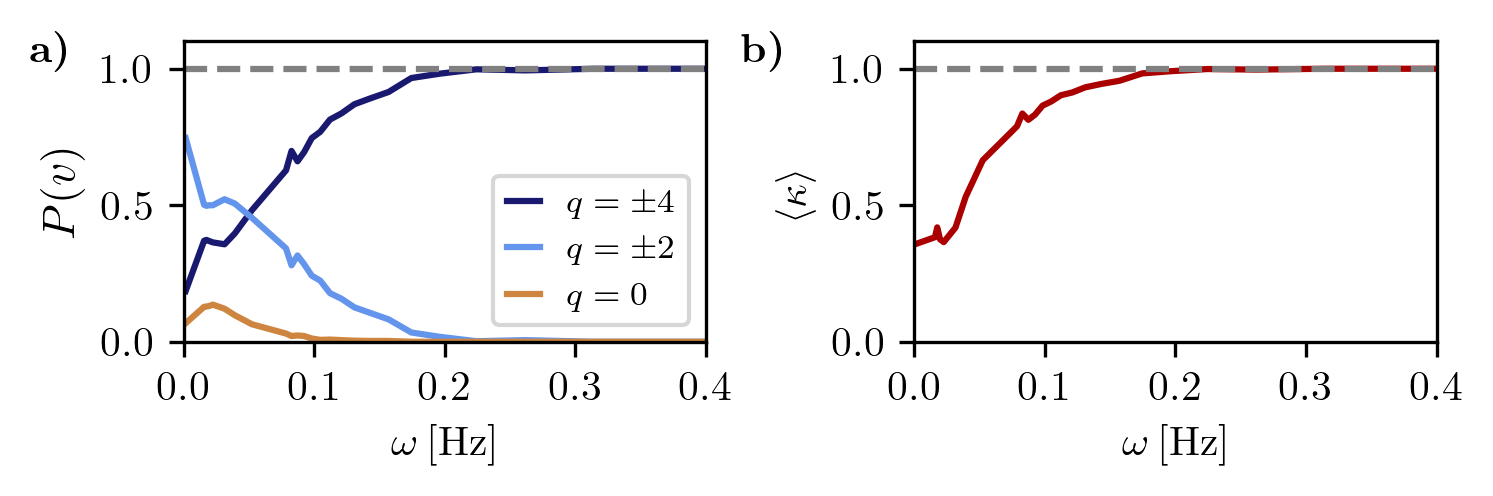

In [53]:
COL = 460/72
OFFSET = -1

fig, axes = plt.subplots(1,2,figsize=(COL+OFFSET,1.3),dpi=300)
plt.subplots_adjust(wspace=0.4)

types = ['I','II','III','VI','V','VI']
colors = ['#191970', '#6495ed', '#cd853f']

# ==========================================================================================================
# VERTICES COUNTS
# ==========================================================================================================

ax = axes[0]
ax.plot(counts.omega, counts.I + counts.VI,'-',color=colors[0], label='$q=\\pm 4$')
ax.plot(counts.omega, counts.II + counts.V,'-',color=colors[1], label='$q=\\pm 2$')
ax.plot(counts.omega, counts.III + counts.IV,'-',color=colors[2], label='$q = 0$')
ax.set_xlim(0,0.4)
ax.set_ylim(0,1.1)
ax.set_ylabel('$P(v)$', fontsize=11)
ax.set_xlabel('$\\omega \\, [\\mathrm{Hz}]$')
ax.axhline(1,color='gray',linestyle='--')
ax.legend(fontsize=8,handlelength=1, ncol=1)

# ==========================================================================================================
# ORDER PARAMETERS
# ==========================================================================================================`

#ax = fig.add_subplot(gs[1])
ax = axes[1]
ax.plot(final_kappa.omega, final_kappa.kappa, color='#aa0000', label='$\\kappa$')

ax.set_xlim(0,0.4)
ax.set_ylim(0,1.1)
ax.set_ylabel('$\\langle \\kappa \\rangle$')
ax.set_xlabel('$\\omega \\, [\\mathrm{Hz}]$')
ax.axhline(1,color='gray',linestyle='--')
#ax.axhline(0.5,color='gray',linestyle='--')

# ==========================================================================================================
# LABELS AND OTHER STUFF
# ==========================================================================================================`

fig.text(0.03,0.83,'\\textbf{a)}')
fig.text(0.47,0.83,'\\textbf{b)}')

figpath = '/home/frieren/Dropbox/mnt/thesis/latex/figures/part4'
fig.savefig(os.path.join(figpath,'freqgs_countsop.pdf'),dpi=300,bbox_inches='tight',pad_inches=0)

plt.show()